<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Gaussian Distribution

A Gaussian (or normal) distribution is characterized by its mean (\(\mu\)) and covariance (\(\Sigma\)). In a \(d\)-dimensional space, the probability density function of a Gaussian distribution is:

$p(x \mid \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)$

## Mixture Models

> A mixture model represents the presence of subpopulations within an overall population without requiring that an observed dataset identifies the subpopulation to which an individual observation belongs. A Gaussian Mixture Model (GMM) assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters.

## Model Definition

A GMM is defined by the following components:

- $K$: The number of Gaussian components.
- $\pi_k$: The mixing coefficient for component $k$ with $\sum_{k=1}^{K} \pi_k = 1$ and $\pi_k \geq 0$.
- $\mu_k$: The mean vector of the \(k\)-th Gaussian component.
- $\Sigma_k$: The covariance matrix of the \(k\)-th Gaussian component.

The probability density function of a GMM is given by:

$ p(x) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k) $

where $\mathcal{N}(x \mid \mu_k, \Sigma_k)$ is the Gaussian density for component \(k\).

## Expectation-Maximization (EM) Algorithm

The EM algorithm is used to find the parameters of the GMM that best fit the data. It consists of two main steps:

- Expectation (E) Step: Calculate the responsibility that each Gaussian component takes for each data point.
- Maximization (M) Step: Update the parameters (π, μ, Σ) to maximize the likelihood of the observed data given these responsibilities.

## Applications

GMMs are widely used in:

- Clustering: Identifying groups in data.
- Anomaly Detection: Detecting outliers as points with low probability under the model.
- Density Estimation: Estimating the underlying distribution of data.

## Implementation

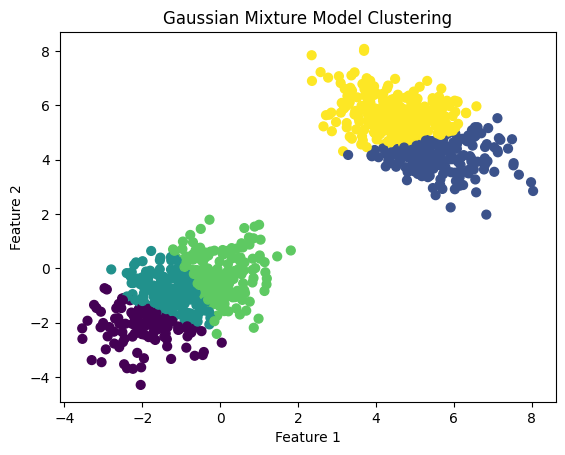

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generating sample data
np.random.seed(0)
n_samples = 500

# Generate random samples from two different Gaussian distributions
X = np.vstack([np.random.multivariate_normal(mean=[-1, -1], cov=[[1, 0.5], [0.5, 1]], size=n_samples),
               np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.5], [-0.5, 1]], size=n_samples)])

# Fit the GMM model
gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(X)

# Predict the labels for the data points
labels = gmm.predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Key Considerations

- Number of Components (K): Choosing the right number of components is crucial and can be done using methods like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC).
- Initialization: The EM algorithm is sensitive to initialization. Using multiple initializations and choosing the best model can help.
- Covariance Type: GMMs allow different covariance structures ('full', 'tied', 'diag', 'spherical'). The choice depends on the nature of the data.

## Advantages and Disadvantages

Advantages:
- Flexibility: GMMs can model any continuous data distribution, given enough components.
- Probabilistic Model: Provides a probabilistic framework that can be used for soft clustering.

Disadvantages:
- Computational Complexity: EM algorithm can be computationally expensive, especially for large datasets.
- Local Optima: The EM algorithm may converge to a local optimum, making the initialization important.